In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
import warnings
import seaborn as sns

In [4]:
from pylab import rcParams

In [5]:
warnings.simplefilter('ignore')

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
rcParams['figure.figsize'] = 12, 6

In [7]:
TRAIN_DATASET_PATH = 'realestatepriceprediction/train.csv'
TEST_DATASET_PATH = 'realestatepriceprediction/test.csv'
PREPARED_TRAIN_DATASET_PATH = 'realestatepriceprediction/prepared_train.csv'

In [8]:
df = pd.read_csv(PREPARED_TRAIN_DATASET_PATH)

In [9]:
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,0,11,1,184966.930730
1,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,1,16,1,300009.450063
2,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,1,3,1,220925.908524
3,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,0,5,1,175616.227217
4,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2,4,1,150226.531644


In [10]:
price_median = df['Price'].median()
price_mean = df['Price'].mean()
price_mode = df['Price'].mode()[0]
price_min = df['Price'].min()
price_max = df['Price'].max()
print('Наименьшее: ', price_min)
print('Наибольшее: ', price_max)
print('Медиана: ', price_median)
print('Среднее: ', price_mean)
print('Мода: ', price_mode)

Наименьшее:  59174.77802758122
Наибольшее:  633233.4665699474
Медиана:  192269.64487934904
Среднее:  214138.85739873844
Мода:  59174.77802758122


Обратим внимание, что min и mode равны.

In [12]:
# Посчитаем их
df.loc[df['Price'] == df['Price'].mode(), 'Price'].count()

1

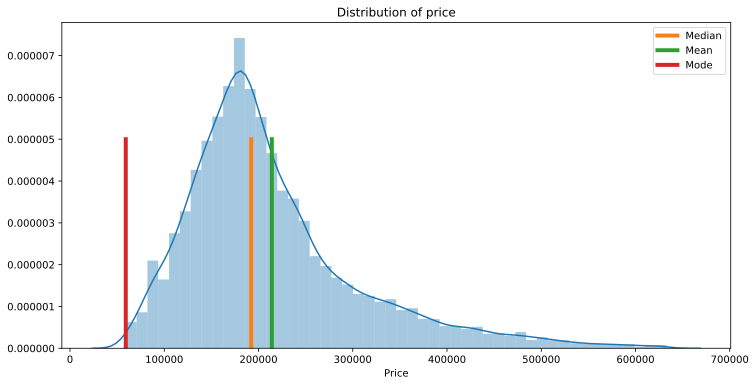

In [13]:
plt.figure(figsize=(12, 6))
sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 200)
plt.plot([price_median]*200, y, label='Median', linestyle='-', linewidth=4)
plt.plot([price_mean]*200, y, label='Mean', linestyle='-', linewidth=4)
plt.plot([price_mode]*200, y, label='Mode', linestyle='-', linewidth=4)

plt.title('Distribution of price')
plt.legend(loc='upper right')
plt.show()

### Оценка цены в разрезе других признаков

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(6), int64(11)
memory usage: 1.3 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27101c10>,
      dtype=object)

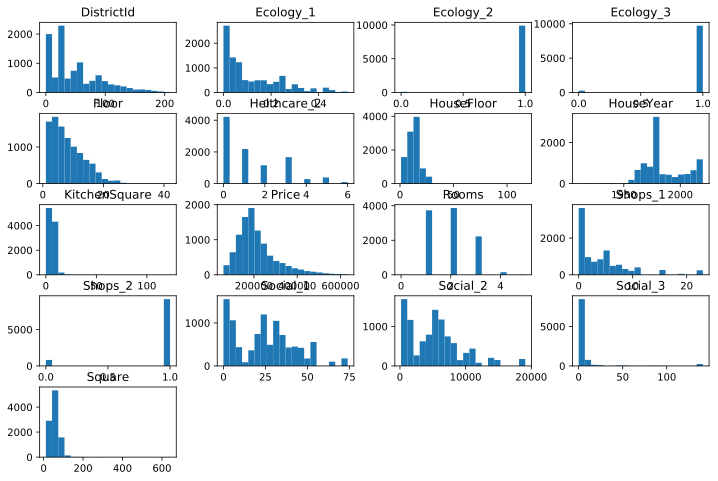

In [15]:
df.hist(figsize=(12, 8), bins=20, grid=False)

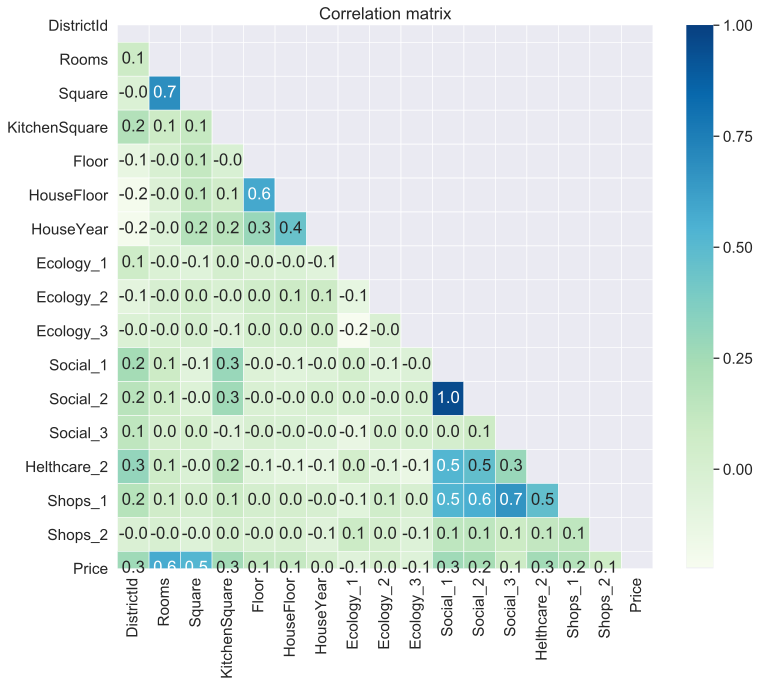

In [18]:
corr = df.corr()
plt.figure(figsize = (12, 10))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()